# Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Datasets

In [2]:
data=pd.read_csv('/Users/somshubhrodatta/Downloads/Agri_district.csv')
india_gdf = gpd.read_file(filename='/Users/somshubhrodatta/Downloads/india_geo')

# Algorithms

/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            state        district commodity  variety              market  \
2076  West Bengal         Bankura   Mustard  Mustard  Bishnupur(Bankura)   
2077  West Bengal         Bankura     Onion    Nasik  Bishnupur(Bankura)   
2078  West Bengal         Bankura    Potato    Jyoti  Bishnupur(Bankura)   
2079  West Bengal         Bankura      Rice   Common  Bishnupur(Bankura)   
2080  West Bengal         Bankura      Rice     Fine  Bishnupur(Bankura)   
...           ...             ...       ...      ...                 ...   
2233  West Bengal  Uttar Dinajpur    Potato    Jyoti            Islampur   
2234  West Bengal  Uttar Dinajpur      Rice    Other            Islampur   
2235  West Bengal  Uttar Dinajpur      Jute     TD-5             Raiganj   
2236  West Bengal  Uttar Dinajpur      Rice    Other             Raiganj   
2237  West Bengal  Uttar Dinajpur     Wheat   Kalyan             Raiganj   

      modal_price        cl  pca_result  cluster  
2076         4200  0.579894    0.579

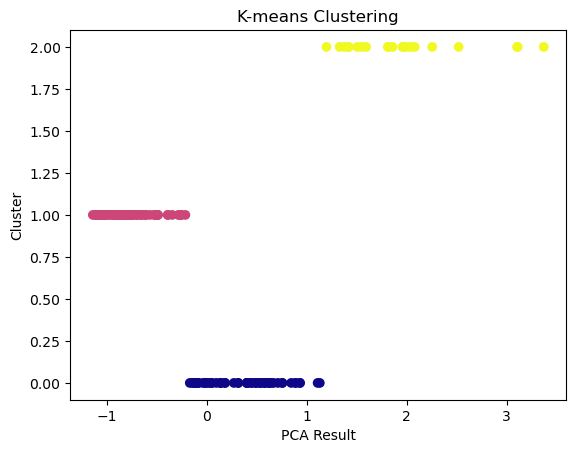

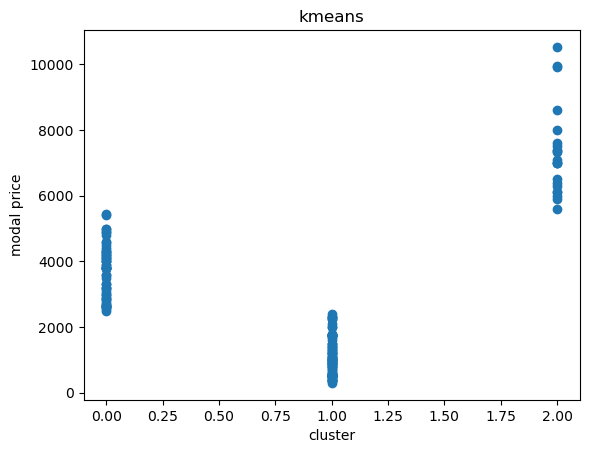

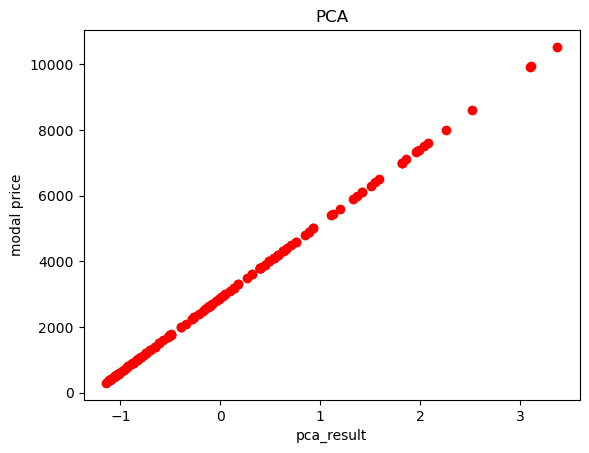

In [3]:
selected_columns = ['state', 'district','commodity','variety','market', 'modal_price']
data1 = data[data['state']=='West Bengal'][selected_columns]

# Standardize the 'modal_price' column
scaler = StandardScaler()
data1['cl'] = scaler.fit_transform(data1['modal_price'].values.reshape(-1, 1))
pca = PCA(n_components=1)

# Fit and transform the data
data1['pca_result'] = pca.fit_transform(data1[['cl']])

#'pca_result' as a single feature for clustering
n_clusters =3

# Initialize K-means
kmeans = KMeans(n_clusters=n_clusters)

# Fit K-means to the data
data1['cluster'] = kmeans.fit_predict(data1[['modal_price']])
print(data1)
plt.scatter(data1['pca_result'], data1['cluster'], c=data1['cluster'], cmap='plasma')
plt.xlabel('PCA Result')
plt.ylabel('Cluster')
plt.title('K-means Clustering')
plt.show()
plt.scatter(data1['cluster'],data1['modal_price'])
plt.title('kmeans')
plt.xlabel('cluster')
plt.ylabel('modal price')
plt.show()
plt.scatter(data1['pca_result'],data1['modal_price'],c='red')
plt.title('PCA')
plt.xlabel('pca_result')
plt.ylabel('modal price')
plt.show()

# Raw Data Visualisation and Data Cleaning

/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

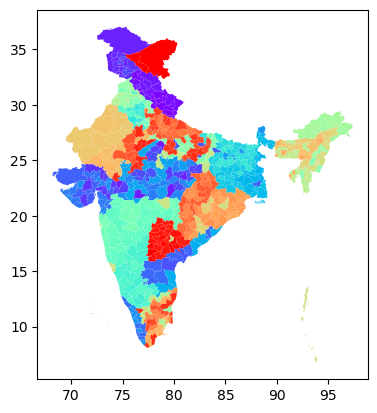

In [4]:
india_gdf.plot(cmap='rainbow')

In [5]:
india_gdf['statename'] = india_gdf['statename'].apply(
    func=lambda x : x.replace('&', 'and') if '&' in x else x
)

In [6]:
state_replacements = {
    'Andaman and Nicobar Islands' : 'Andaman and Nicobar',
    'Orissa' : 'Odisha',
    'Uttarakhand' : 'Uttrakhand',
    'Chhatisgarh' : 'Chattisgarh'
}

district_replacements = {
    'Thrissur': 'Thirssur',
    'Viluppuram': 'Villupuram',
    'Kasaragod': 'Kasargod',
    'Vadodara': 'Vadodara(Baroda)',
    'Bulandshahr': 'Bulandshahar',
    'Tarn Taran': 'Tarntaran',
    'Sundargarh': 'Sundergarh',
    'Kannauj': 'Kannuj',
    'Dehradun': 'Dehradoon',
    'Jalor': 'Jalore',
    'Sipahijula': 'Sepahijala',
    'South Twenty Four Parganas': 'Sounth 24 Parganas',
    'Solapur': 'Sholapur',
    'Moradabad': 'Muradabad',
    'Rupnagar': 'Ropar (Rupnagar)',
    'North Twenty Four Parganas': 'North 24 Parganas',
    'Lakhimpur': 'Khiri (Lakhimpur)',
    'Panch Mahals': 'Panchmahals',
    'Maldah': 'Malda',
    'Barddhaman':'Burdwan',
    'Barwani': 'Badwani',
    'Paschim Medinipur': 'Medinipur(W)',
    'Gautam Buddha Nagar': 'Gautam Budh Nagar',
    'Chitrakoot': 'Chitrakut',
    'Rangareddy': 'Ranga Reddy',
    'Narsimhapur': 'Narsinghpur',
    'Chittoor': 'Chittor',
    'Anugul': 'Angul',
    'Farrukhabad': 'Farukhabad',
    'Nabarangapur': 'Nowarangpur',
    'Tiruvannamalai': 'Thiruvannamalai',
    'Jalaun': 'Jalaun (Orai)',
    'Bathinda': 'Bhatinda',
    'Hugli': 'Hooghly',
    'Hydrabad': 'Hyderabad',
    'Ahmadnagar': 'Ahmednagar',
    'Rae Bareli': 'Raebarelli',
    'Udham Singh Nagar': 'UdhamSinghNagar',
    'Kanniyakumari': 'Nagercoil (Kannyiakumari)',
    'Anuppur': 'Anupur',
    'Chittaurgarh': 'Chittorgarh',
    'Buldana': 'Buldhana'
}

agri_dist_replacements = {
    'Lakhimpur' : 'Khiri (Lakhimpur)',
    'Mayurbhanja' : 'Mayurbhanj'
}

In [7]:
for (o, r) in state_replacements.items():
    india_gdf['statename'].replace(to_replace=o, value=r, inplace=True)

for (o, r) in district_replacements.items():
    india_gdf['distname'].replace(to_replace=o, value=r, inplace=True)

for (o, r) in agri_dist_replacements.items():
    data['district'].replace(to_replace=o, value=r, inplace=True)

# Data Analysis (State and Districtwise)

In [8]:
def filter_statewise(state_name, df, gdf, comm=None, show_plot=False, plot_column=None, show_country=False):
    # Copy the original GeoDataFrame to prevent modification of the input data
    country_gdf = gdf.copy()
    available_cols = ['commodity', 'variety', 'min_price', 'max_price', 'modal_price']
    
    if plot_column in available_cols:
        if (plot_column == 'commodity') or (plot_column == 'variety'):
            aggfunc = 'count'
        else:
            aggfunc = 'mean'
    else:
        plot_column = 'modal_price'
        aggfunc = 'mean'
    
    # Filter the DataFrame and GeoDataFrame for the specified state
    df = df[df['state'] == state_name]
    gdf = gdf[gdf['statename'] == state_name]
    
    # Select specific columns from the DataFrames
    df = df[['district', 'market', 'commodity', 'variety', 'modal_price']]
    gdf = gdf[['distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale', 'totpopfema',
               'st_areasha', 'st_lengths', 'geometry']]
    gdf.columns = ['district', 'dist_area', 'popn', 'total_hh', 'male_popn', 'female_popn',
                   'st_areasha', 'st_lengths', 'geometry']
    
    # Merge the DataFrames based on the 'district' column
    state_data = gdf.merge(df, on='district', how='left')
    
    if show_plot:
            ax = state_data.plot(color='white', edgecolor='black', figsize=(10, 6))
            
            # Filter state data based on the 'commodity' (if specified)
            if comm is not None:
                state_data_filtered = state_data[state_data['commodity'] == comm]
            else:
                state_data_filtered = state_data
            
            # Plot the selected data
            state_data_filtered.plot(column=plot_column, legend=True, legend_kwds={'shrink': 0.3}, ax=ax)
            ax.set_title('{}; {} ; {}'.format(state_name,comm, plot_column))
            plt.show()
            
            # Plot other visualizations as needed (commodities and varieties)
            
                # Commodity bar plot
            plt.barh(df['commodity'], df['modal_price'])
            plt.title(state_name + '; Commodities')
            plt.xlabel('modal price')
            plt.show()
            if comm is not None:  
                # Modal price of the specified commodity
                plt.barh(df[df['commodity'] == comm]['district'], df[df['commodity'] == comm]['modal_price'])
                plt.title(state_name + '; ' + comm + '; modal_price')
                plt.xlabel('modal price')
                plt.show()
                # Varieties bar plot
                plt.barh(df[df['commodity'] == comm]['variety'], df[df['commodity'] == comm]['modal_price'])
                plt.title(state_name + '; '+comm+' ; Varieties')
                plt.xlabel('modal price')
                plt.show()
    
    

/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


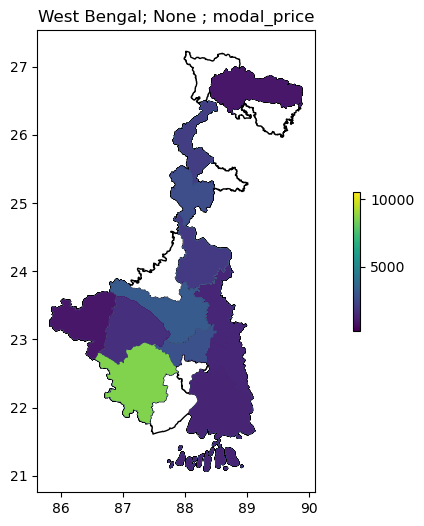

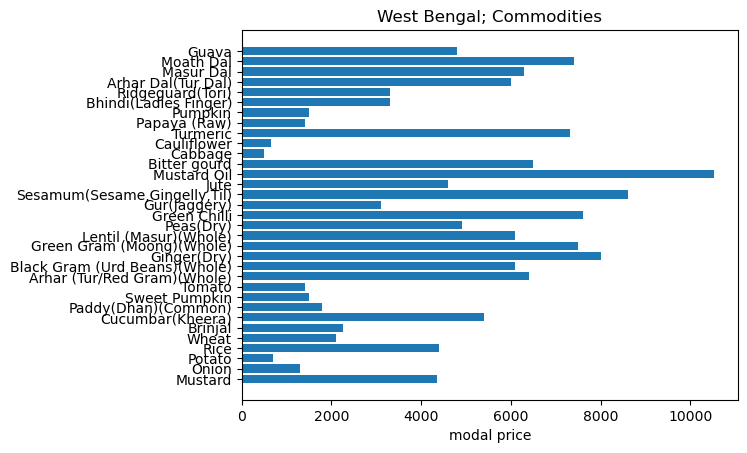

In [9]:
filter_statewise(
    state_name='West Bengal',
    df=data,
    gdf=india_gdf,
    comm=None,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


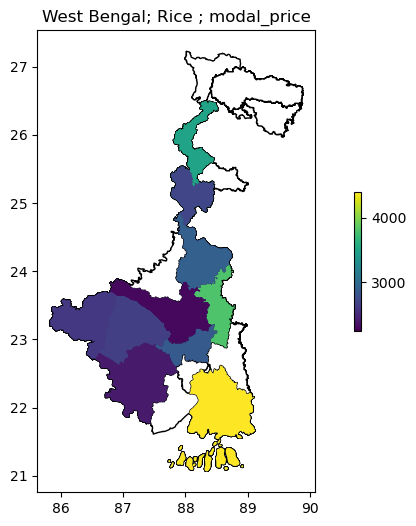

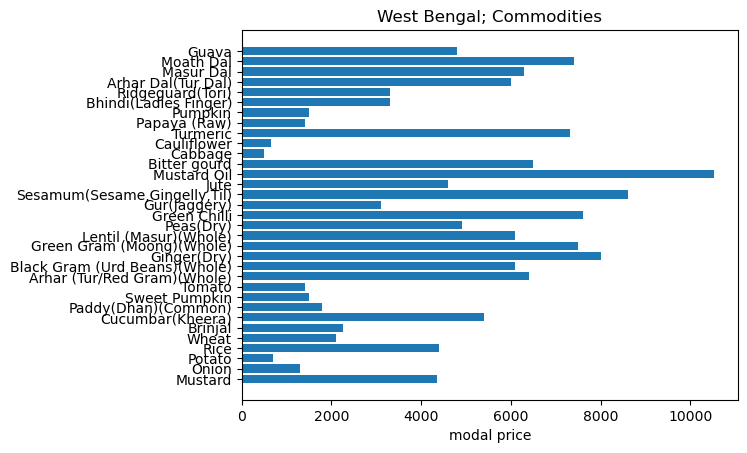

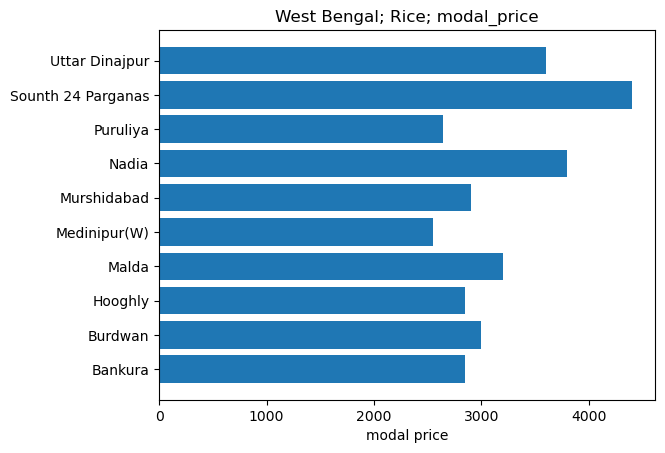

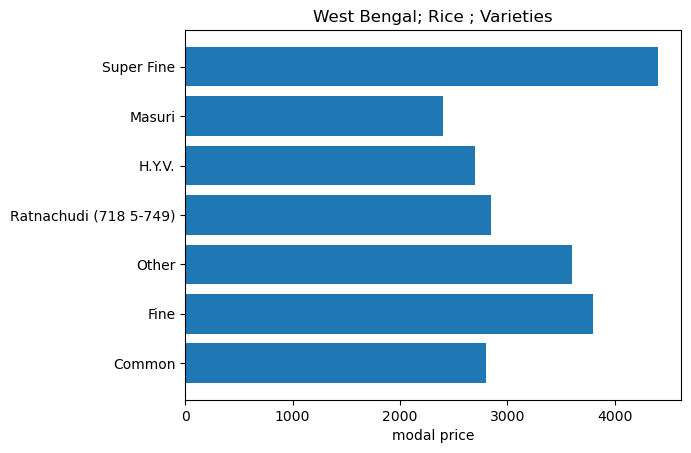

In [10]:
filter_statewise(
    state_name='West Bengal',
    df=data,
    gdf=india_gdf,
    comm='Rice',
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

In [11]:
def filter_distwise(state_name,distname, df, gdf,comm=None, show_plot=False, plot_column=None, show_country=False):
    country_gdf = gdf
    available_cols = ['commodity', 'variety', 'min_price', 'max_price', 'modal_price']
    
    if plot_column in available_cols:
        if (plot_column == 'commodity') or (plot_column == 'variety'):
            aggfunc = 'count'
        else:
            aggfunc = 'mean'
    else:
        plot_column = 'modal_price'
        aggfunc = 'mean'
    
    df = df[df['state'] == state_name]
    gdf = gdf[gdf['statename'] == state_name]
    
    df = df[['district', 'market', 'commodity', 'variety','modal_price']]
    gdf = gdf[['distname', 'distarea', 'totalpopul', 'totalhh', 
               'totpopmale', 'totpopfema', 'st_areasha', 'st_lengths', 'geometry']]
    gdf.columns = ['district', 'dist_area', 'popn', 'total_hh','male_popn', 
                   'female_popn', 'st_areasha', 'st_lengths', 'geometry']
    
    state_data = gdf.merge(df, on='district', how='left')
    
    if show_plot:
        if plot_column:
            state_geometry = state_data['geometry']
            state_data_dis = state_data.dissolve(by=['district'], aggfunc=aggfunc)
            
            
            # commodities
            plt.tight_layout()
            plt.barh(df[df['district']==distname]['commodity'],df[df['district']==distname]['modal_price'])
            plt.title(distname + '; Commodities')
            plt.xlabel('modal price')
            plt.show()
            
            # varieties
            plt.tight_layout()
            if comm==None:
                plt.barh(df[df['district']==distname]['commodity'],df[df['district']==distname]['modal_price'])
                plt.title(state_name + ' ; commodity')
                plt.xlabel('modal price')
                plt.show()
                plt.barh(df[df['district']==distname]['market'],df[df['district']==distname]['modal_price'])
                plt.title(distname + ' ; market')
                plt.xlabel('modal price')
                plt.show()
            else:
                plt.bar(df[(df['district'] == distname) & (df['commodity'] == comm)]['variety'],
                        df[(df['district']== distname) & (df['commodity'] == comm)]['modal_price'])
                plt.title(distname+' ; ' +comm+ ' ; Varieties')
                plt.ylabel('modal price')
                plt.show()
                plt.bar(df[(df['district'] == distname) & (df['commodity'] == comm)]['market'],
                        df[(df['district'] == distname) & (df['commodity'] == comm)]['modal_price'])
                plt.title(distname+' ; ' +comm+ ' ; Market')
                plt.ylabel('modal price')
                plt.show()
            
            return None
        
        return "Requires `plot_column`"
    return state_data

/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1493: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


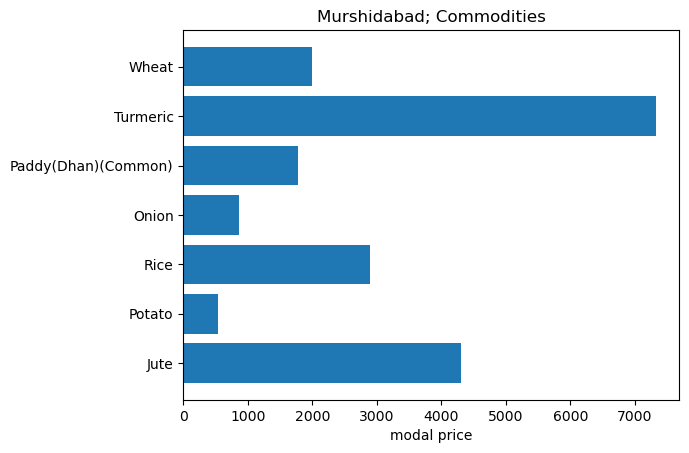

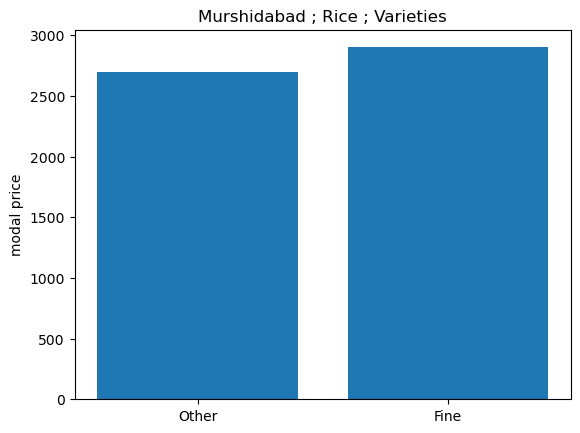

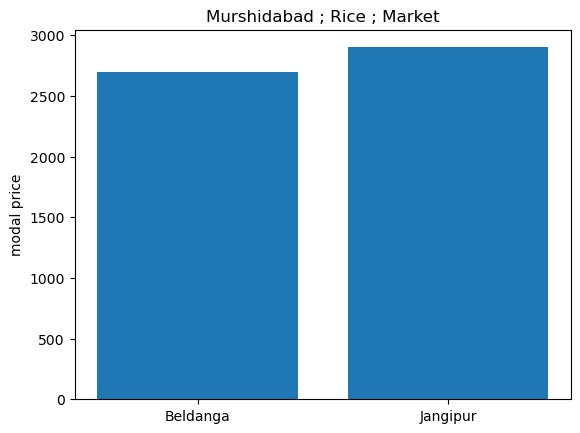

In [12]:
filter_distwise(
    state_name='West Bengal',
    distname='Murshidabad',
    df=data,
    gdf=india_gdf,
    comm='Rice',
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1493: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)
/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


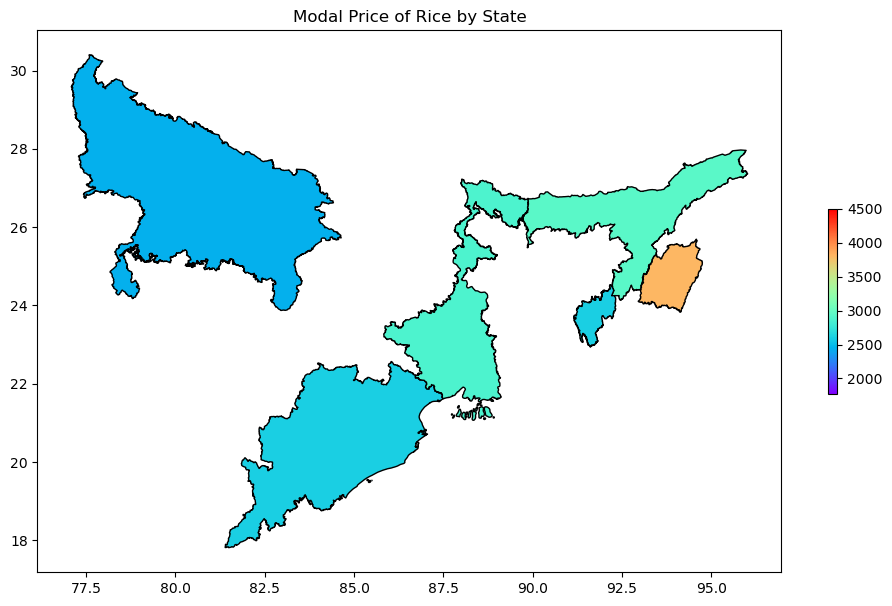

In [13]:


def compare_states_modal_price(df, gdf, comm, plot_column='modal_price'):
    # Copy the original GeoDataFrame to prevent modification of the input data
    country_gdf = gdf.copy()

    # Filter the DataFrame for the specified crop (comm)
    df = df[df['commodity'] == comm]

    # Create a new GeoDataFrame with just the states' geometries
    states_gdf = gdf[['statename', 'geometry']].copy()

    # Merge the DataFrames based on the 'state' column
    geo_col = 'statename'  # Adjust this to the actual column name in your GeoDataFrame

    # Merge the DataFrames based on the specified columns
    state_data = states_gdf.merge(df, left_on='statename',right_on='state')
    state_data1=state_data.dissolve(by=['state'],aggfunc='mean')
    
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the data
    state_data1.plot(column=plot_column, edgecolor='black', legend=True, legend_kwds={'shrink': 0.3}, ax=ax,
                     cmap='rainbow', vmin=state_data[plot_column].min(), vmax=state_data[plot_column].max())
    ax.set_title('Modal Price of {} by State'.format(comm))

# Example usage:
compare_states_modal_price(data, india_gdf, 'Rice', 'modal_price')


/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


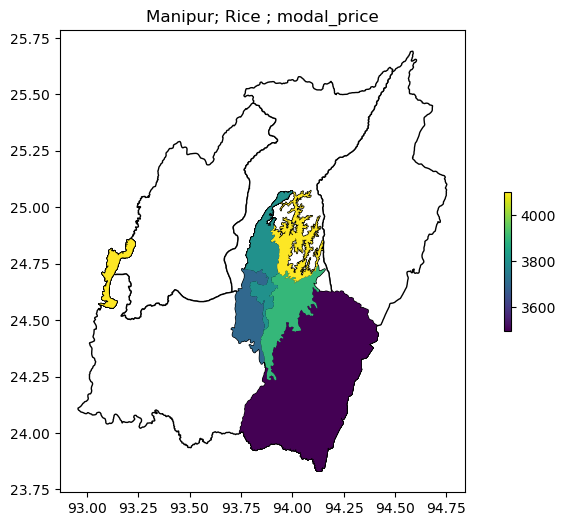

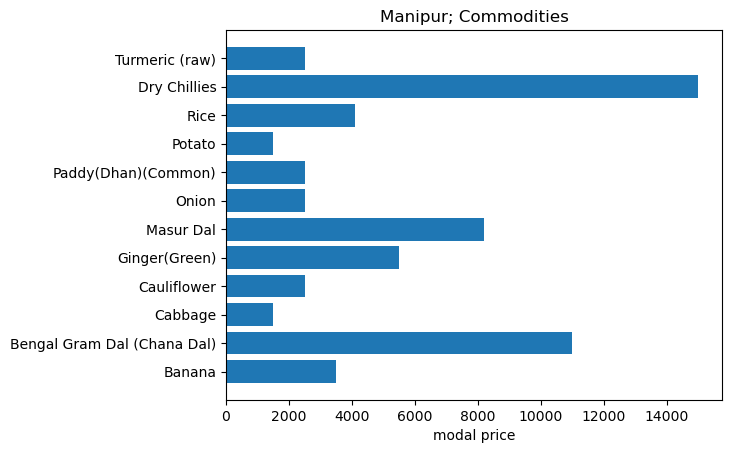

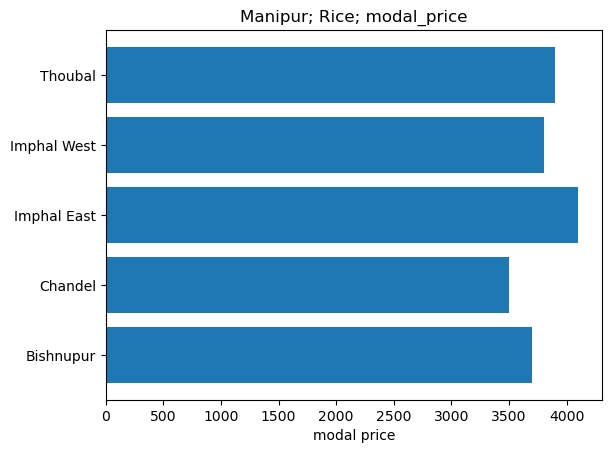

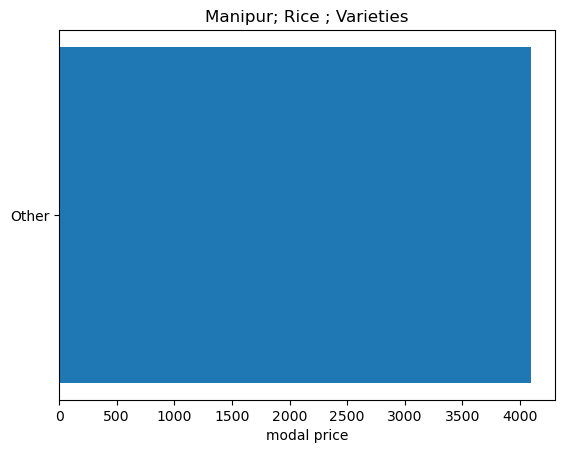

In [14]:
filter_statewise(
    state_name='Manipur',
    df=data,
    gdf=india_gdf,
    comm='Rice',
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

/Users/somshubhrodatta/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1493: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


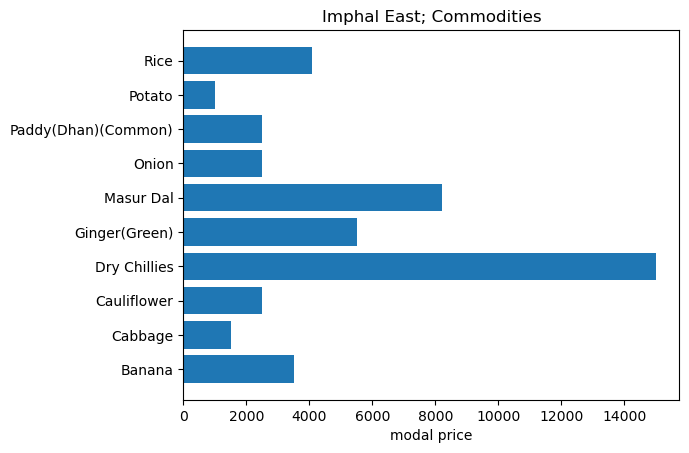

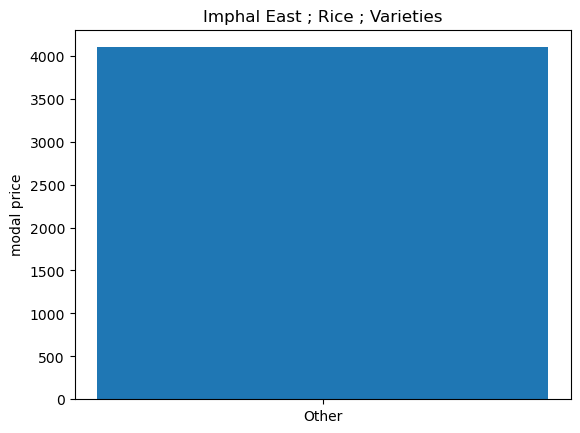

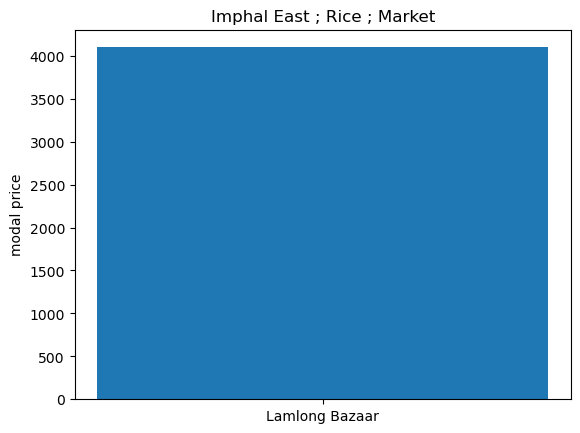

In [15]:
filter_distwise(
    state_name='Manipur',
    distname='Imphal East',
    df=data,
    gdf=india_gdf,
    comm='Rice',
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)